---
**Initial value problems for ODEs**

Assignment Week 14 of EMAT30008

https://engmaths.github.io/emat30008/odes/ivps/ 

(See week14funcs.py for associated functions)

Author: Ben Winstanley, yy23737@bristol.ac.uk

---

In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from week14funcs import euler_step, solve_to 
import time

---
**Testing our euler_step function:**

Test ODE is   $ \frac{dx}{dt} = x^2 + x \cos(t) $

Calculate single step, from start point $ x(0)=2 $, step size $ h=1 $.
 
(We should get $ 2^2 + 2\cos{0} = 8 $)


In [5]:
def test_euler_step(x: np.ndarray, t: float):
    '''
    Testing function for euler_step function
    Acts as RHS of ODE x' = x^2 + xcos(t)
    '''
    dxdt = x**2 + x*np.cos(t)
    return dxdt

xnext = euler_step(test_euler_step, np.array((2)), 0, 1)
print(xnext)

8.0


---
**Testing our solve_to function:**

ODE IVP  $ \frac{dx}{dt} = x , \ x_0 = 1$, 

Using Euler method with step size $  h = 0.12$,  until final time $  t = 1$.

(Note analytical solution is $ x(t) = e ^ t \ \ \forall t $)

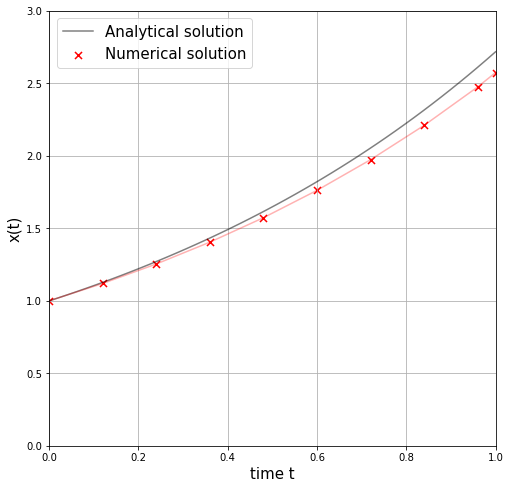

In [6]:
def test_ode_func(x: np.ndarray, t: float):
    '''
    RHS for ODE x'=x
    '''
    dxdt = x
    return dxdt

# Calling function
solution = solve_to(test_ode_func, np.array((1)), 0, 1, 0.12, 'Euler')

# Seperating times and x values
times = solution[:,0]
xvals = solution[:,1:]

# Plotting
plt.figure(figsize=[8,8])
plt.plot(np.linspace(0,1,50), np.exp(np.linspace(0,1,50)), 'k-', label='Analytical solution', alpha=0.5)
plt.scatter(times, xvals, label='Numerical solution', c='r', marker='x', s=50)
plt.plot(times, xvals, c='r', alpha=0.3)
plt.xlabel("time t", fontsize = 15)
plt.ylabel("x(t)", fontsize= 15)
plt.ylim([0,3])
plt.xlim([0,1])
plt.legend(fontsize=15)
plt.grid()
plt.show()

---
**Calculating error for different step sizes $h$**

Varying step size by magnitude from $10^{-5}$ to $10^{-1}$

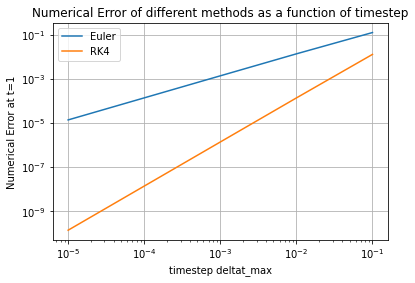

In [7]:
# Initiate store
magnitudes = list(range(-5,0))
euler_error_store = []
rk4_error_store = []
hvals = []

# Loop over different timesteps
for i in magnitudes:
    hvals += [10**i]
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**i, 'Euler')
    error = np.abs(np.exp(1)-solution[-1,-1])
    euler_error_store += [error]
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**i, 'RK4')
    error = np.abs(np.exp(1)-solution[-1,-1])
    rk4_error_store += [error]

# Plot
plt.loglog(hvals, euler_error_store, label="Euler")
plt.loglog(hvals, rk4_error_store, label="RK4")
plt.xlabel("timestep deltat_max")
plt.ylabel("Numerical Error at t=1")
plt.title("Numerical Error of different methods as a function of timestep")
plt.legend()
plt.grid()
plt.show()


Here we see that the Runge-Kutta 4 method performs better than the Euler method for every value of the timestep. The Runge-Kutta method's error diminishes at a greater rate than the Euler method.

Comparing gradients to estimate scaling:

Euler: 

$ \log(error) = (\frac{-4}{4}) \log( \Delta t) + c  \\ $
$ \to error = A \ (\Delta t)^{(\frac{-4}{4})} = A \ (\Delta t)^{-1} \\ $
So $ \ error = \mathcal{O}((\Delta t)^{-1}) $

RK4:

$ \log(error) = (\frac{-8}{4}) \log( \Delta t) + c  \\ $
$ \to error = A \ (\Delta t)^{(\frac{-8}{4})} = A \ (\Delta t)^{-2} \\ $
So $ \ error = \mathcal{O}((\Delta t)^{-2}) $


---
Note that the error is the same size for the Euler method at $\Delta t = 10^{-2}$ and the RK4 method at $\Delta t = 10^{-1}$. This is also the case for the Euler method at $\Delta t = 10^{-4}$ and the RK4 method at $\Delta t = 10^{-2}$

We compare the execution times of each method to produce the same error size

In [34]:
# Time Euler method at dt = 10^-2, averaged over 100 trials
t0 = time.time()
for i in range(100):
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**-2, 'Euler')
t1 = time.time()
print("The Euler method at dt = 10^-2 takes time ",(t1-t0)/100,"s")

# Time RK4 method at dt = 10^-1, over 100 trials
t2 = time.time()
for i in range(100):
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**-1, 'RK4')
t3 = time.time()
print("The RK4 method at dt = 10^-1 takes time ",(t3-t2)/100,"s")

print("The ratio between Euler and RK execution times is ", (t1-t0)/(t3-t2), "\n")


# Time Euler method at dt = 10^-4, averaged over 100 trials
t0 = time.time()
for i in range(100):
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**-4, 'Euler')
t1 = time.time()
print("The Euler method at dt = 10^-2 takes time ",(t1-t0)/100,"s")

# Time RK4 method at dt = 10^-2, over 100 trials
t2 = time.time()
for i in range(100):
    solution = solve_to(test_ode_func, np.array((1)), 0, 1, 10**-2, 'RK4')
t3 = time.time()
print("The RK4 method at dt = 10^-1 takes time ",(t3-t2)/100,"s")

print("The ratio between Euler and RK execution times is ", (t1-t0)/(t3-t2))



The Euler method at dt = 10^-2 takes time  0.0009385490417480469 s
The RK4 method at dt = 10^-1 takes time  0.00022114992141723634 s
The ratio between Euler and RK execution times is  4.243949243722846 

The Euler method at dt = 10^-2 takes time  0.0837845778465271 s
The RK4 method at dt = 10^-1 takes time  0.0008342289924621583 s
The ratio between Euler and RK execution times is  100.4335483465323


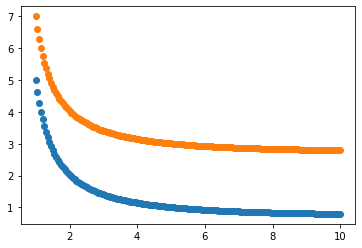

In [5]:
def shmfunc(x,t):
    '''
    rhs of x'' = -x
    let v = x', X = [x v]
    then x' = v = X[1]
    and  v' = -x = -X[0]
    '''
    return np.array((x[1], -x[0]))

def lotkavolterra(x,t):
    X = x[0]
    Y = x[1]
    a = 1.1
    b = 0.4
    c = 0.1
    d = 0.4

    return np.array((a*X-b*X*Y), (c*X*Y - d*Y))

x_init = np.array((5,7))
t_init = 1
t_final = 10
deltat_max = 0.05
#print(int(np.floor((5-1)/0.05)))
solution = solve_to(lotkavolterra, x_init, t_init, t_final, deltat_max, 'RK4')

plt.scatter(solution[:,0], solution[:,1])

plt.scatter(solution[:,0], solution[:,2])



In [6]:
# testing concatenation and stacking
foo = np.array([1,2])
doo = np.array([[3, 4]])
loo = np.array([5,6])

zoo = np.vstack((foo, doo))
print(zoo)
print(np.shape([loo]))
boo = np.concatenate((np.array([loo]).T, zoo), axis=1)
print(boo)


[[1 2]
 [3 4]]
(1, 2)
[[5 1 2]
 [6 3 4]]


In [7]:
def stupidfunc(start, stop, step):
    values = np.arange(start, stop, step)
    return values

myvals = stupidfunc(1,5,0.2)
print(myvals)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4
 4.6 4.8]


In [8]:
foo = np.array([[1,2,3], [4,5,6]])
print(foo)
tfinal = 7
xfinal = np.array([8,9])
lastrow = np.concatenate(([tfinal], xfinal))
print(lastrow)
finalmatrix = np.vstack((foo, lastrow))
print(finalmatrix)



[[1 2 3]
 [4 5 6]]
[7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [9]:
stepsize = 0.1
numpoints = int(np.ceil((1-0)/stepsize))
foo = np.linspace(0,1, numpoints, endpoint=False)
print(foo)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [10]:
foo = 7
zoo = np.array([1,3])
boo = np.append(zoo, foo)
print(boo)

[1 3 7]
